In [1]:
import pandas as pd

In [2]:
user_log = pd.read_csv('C:/Stats Consulting/user_log.csv', iterator=True, chunksize=10000)

In [3]:
user_log = pd.concat(user_log, ignore_index=True)

In [4]:
print(user_log.head())

   user_id  item_id  cat_id  seller_id  brand_id  time_stamp  action_type
0   328862   323294     833       2882    2661.0         829            0
1   328862   844400    1271       2882    2661.0         829            0
2   328862   575153    1271       2882    2661.0         829            0
3   328862   996875    1271       2882    2661.0         829            0
4   328862  1086186    1271       1253    1049.0         829            0


In [5]:
user_log.isnull().any()

user_id        False
item_id        False
cat_id         False
seller_id      False
brand_id        True
time_stamp     False
action_type    False
dtype: bool

In [6]:
user_log[user_log['brand_id'].isnull()]

,user_id,item_id,cat_id,seller_id,brand_id,time_stamp,action_type
4429,198759,558012,346,2242,NaN,1111,2
10494,398807,692695,1023,2791,NaN,917,1
11189,289429,989610,845,3139,NaN,801,2
11334,244974,567529,1349,1503,NaN,1109,1
11336,244974,1025591,1077,1503,NaN,1109,1
...,...,...,...,...,...,...,...
54924317,49540,672801,1468,1056,NaN,1111,1
54924338,267868,318890,125,4325,NaN,1110,1
54924390,267868,982887,1505,3049,NaN,1111,1
54924391,267868,576046,1508,2078,NaN,1111,1


In [7]:
import seaborn as sns

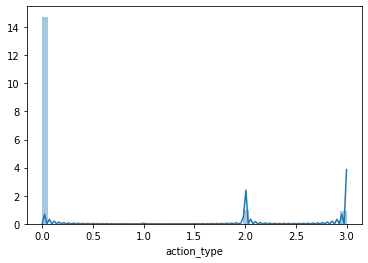

In [8]:
sns.distplot(user_log['action_type'], kde=True, hist=True)

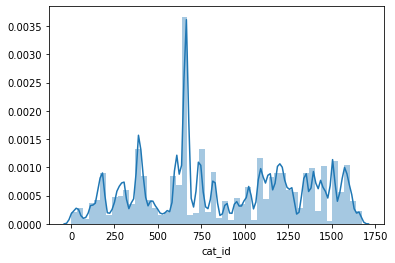

In [9]:
sns.distplot(user_log['cat_id'],hist=True)

In [10]:
user_log['time_stamp'].astype('str')

0            829
1            829
2            829
3            829
4            829
            ... 
54925325    1110
54925326    1110
54925327    1110
54925328    1110
54925329    1111
Name: time_stamp, Length: 54925330, dtype: object

In [11]:
user_log['time_str']= user_log['time_stamp'].astype('str')

In [12]:
user_log['Day']=user_log['time_stamp']%100

In [13]:
print(user_log['Day'].head())

0    29
1    29
2    29
3    29
4    29
Name: Day, dtype: int64


In [14]:
user_log['Month']=(user_log['time_stamp']-user_log['Day'])/100

In [15]:
print(user_log.head())

   user_id  item_id  cat_id  seller_id  brand_id  time_stamp  action_type  \
0   328862   323294     833       2882    2661.0         829            0   
1   328862   844400    1271       2882    2661.0         829            0   
2   328862   575153    1271       2882    2661.0         829            0   
3   328862   996875    1271       2882    2661.0         829            0   
4   328862  1086186    1271       1253    1049.0         829            0   

  time_str  Day  Month  
0      829   29    8.0  
1      829   29    8.0  
2      829   29    8.0  
3      829   29    8.0  
4      829   29    8.0  


In [16]:
user_log['Month']= user_log['Month'].astype('int')

In [17]:
print(user_log.head())

   user_id  item_id  cat_id  seller_id  brand_id  time_stamp  action_type  \
0   328862   323294     833       2882    2661.0         829            0   
1   328862   844400    1271       2882    2661.0         829            0   
2   328862   575153    1271       2882    2661.0         829            0   
3   328862   996875    1271       2882    2661.0         829            0   
4   328862  1086186    1271       1253    1049.0         829            0   

  time_str  Day  Month  
0      829   29      8  
1      829   29      8  
2      829   29      8  
3      829   29      8  
4      829   29      8  


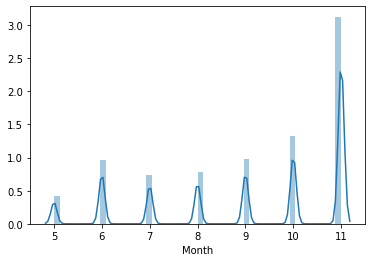

In [18]:
sns.distplot(user_log['Month'],hist=True)

In [19]:
import datetime

In [20]:
user_log.head()

,user_id,item_id,cat_id,seller_id,brand_id,time_stamp,action_type,time_str,Day,Month
0,328862,323294,833,2882,2661.0,829,0,829,29,8
1,328862,844400,1271,2882,2661.0,829,0,829,29,8
2,328862,575153,1271,2882,2661.0,829,0,829,29,8
3,328862,996875,1271,2882,2661.0,829,0,829,29,8
4,328862,1086186,1271,1253,1049.0,829,0,829,29,8


In [21]:
#user_id and category
user_cat_count= user_log.groupby(['user_id','cat_id']).size()

In [22]:
user_cat_click_count = user_log.groupby(['user_id','cat_id','action_type']).size().to_frame()

In [23]:
user_cat_click_count.head()

0
user_id cat_id action_type    
1       276    0             5
        389    0             2
        992    0            10
               2             4
        1023   0             3

In [24]:
#category action
cat_click_count = user_log.groupby(['cat_id','action_type']).size()
cat_click_count.head()

cat_id  action_type
1       0                 221
        2                  48
        3                  11
2       0              113178
        1                 313
dtype: int64

In [25]:
#brand action
brand_click_count = user_log.groupby(['brand_id','action_type']).size()
brand_click_count.head()

brand_id  action_type
1.0       0              3882
          2               316
          3               153
2.0       0                 1
          2                 2
dtype: int64

In [26]:
#merchandise action
mer_click_count = user_log.groupby(['item_id','action_type']).size()
mer_click_count.head()

item_id  action_type
1        0                 1
2        0              2497
         2               338
         3               256
3        0               110
dtype: int64

In [27]:
click_activity_percent = user_log['action_type'].value_counts(normalize=True)*100

In [28]:
dict_user_cat = dict(zip(user_log['user_id'],user_log['cat_id']))

In [29]:
dict_user_brand = dict(zip(user_log['user_id'],user_log['brand_id']))

In [30]:
dict_user_merch = dict(zip(user_log['user_id'],user_log['item_id']))

In [31]:
#user category click activity
user_cat_total = user_log.groupby(['user_id','cat_id'])['action_type'].count().to_frame()
user_cat_total.head()

action_type
user_id cat_id             
1       276               5
        389               2
        992              14
        1023              4
        1252              7

In [42]:
user_cat_total.columns = ['count total']
user_cat_total.head()

count total
user_id cat_id             
1       276               5
        389               2
        992              14
        1023              4
        1252              7

In [40]:
user_cat_click_count.columns = ['size']

In [41]:
user_cat_click_count.head()

size
user_id cat_id action_type      
1       276    0               5
        389    0               2
        992    0              10
               2               4
        1023   0               3

In [43]:
user_cat_activity = user_cat_total.join(user_cat_click_count,how='left')
user_cat_activity['percentage'] = user_cat_activity['size']/user_cat_activity['count total']

In [44]:
user_cat_activity.head()

count total  size  percentage
user_id cat_id action_type                               
1       276    0                      5     5    1.000000
        389    0                      2     2    1.000000
        992    0                     14    10    0.714286
               2                     14     4    0.285714
        1023   0                      4     3    0.750000